Import Libraries

In [ ]:
!pip install proplot
import proplot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data

/content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data


Load Dataset

In [5]:
df = pd.read_csv('Cell_Phones_and_Accessories.csv')
df.head(4)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,6073894996,"[3, 4]",4.0,This is a nice charger but you can tell it was...,"03 20, 2013",A29OXVQRZ154KX,Don Powell,Solid Charger but RF noisy,1.363738e+09
1,9861203192,"[25, 25]",5.0,"Bought this for my new AT&T; Galaxy SII, the c...","10 7, 2011",A1847XXVEA8QUK,Daniel Poole,Awesome case and cheap too,1.317946e+09
2,9985537742,"[10, 11]",3.0,Works fine IF you don't move the phone. If yo...,"11 19, 2010",A2TOXBTDH3Y6R9,Rich H.,"Mediocre, even for the price",1.290125e+09
3,998554627X,"[5, 5]",5.0,was somewhat concerned after reading some of t...,"02 23, 2013",A17X3JUWJY3AXG,Mary Lynn Thompson,would order again,1.361578e+09


In [6]:
df.shape

(10738, 9)

Overall Ratings Count

Text(0.5, 1.0, 'Ratings Count')

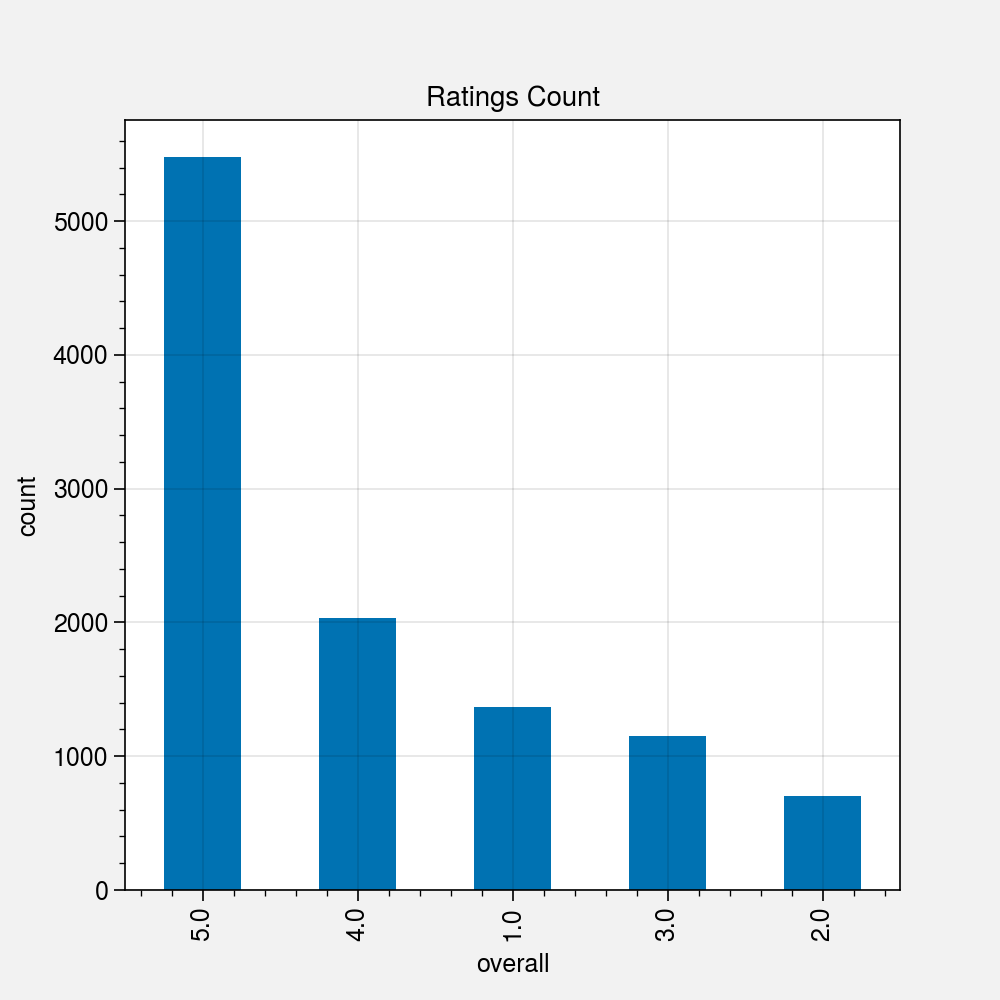

In [7]:
plt = df['overall'].value_counts().plot(kind='bar',figsize=(5, 5))
plt.set_xlabel("overall")
plt.set_ylabel("count")
plt.set_title("Ratings Count")

Extract 'year' from 'reviewTime' column into separate column

In [8]:
df.reviewTime = df.reviewTime.apply(lambda x: ' '.join(i.strip() for i in x.split(",")))
df.reviewTime = pd.to_datetime(df.reviewTime)
df['year']= df['reviewTime'].dt.year
df.head(4)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,year
0,6073894996,"[3, 4]",4.0,This is a nice charger but you can tell it was...,2013-03-20,A29OXVQRZ154KX,Don Powell,Solid Charger but RF noisy,1.363738e+09,2013
1,9861203192,"[25, 25]",5.0,"Bought this for my new AT&T; Galaxy SII, the c...",2011-10-07,A1847XXVEA8QUK,Daniel Poole,Awesome case and cheap too,1.317946e+09,2011
2,9985537742,"[10, 11]",3.0,Works fine IF you don't move the phone. If yo...,2010-11-19,A2TOXBTDH3Y6R9,Rich H.,"Mediocre, even for the price",1.290125e+09,2010
3,998554627X,"[5, 5]",5.0,was somewhat concerned after reading some of t...,2013-02-23,A17X3JUWJY3AXG,Mary Lynn Thompson,would order again,1.361578e+09,2013


Bar Plot of average rating each year

Text(0.5, 1.0, 'Average Rating')

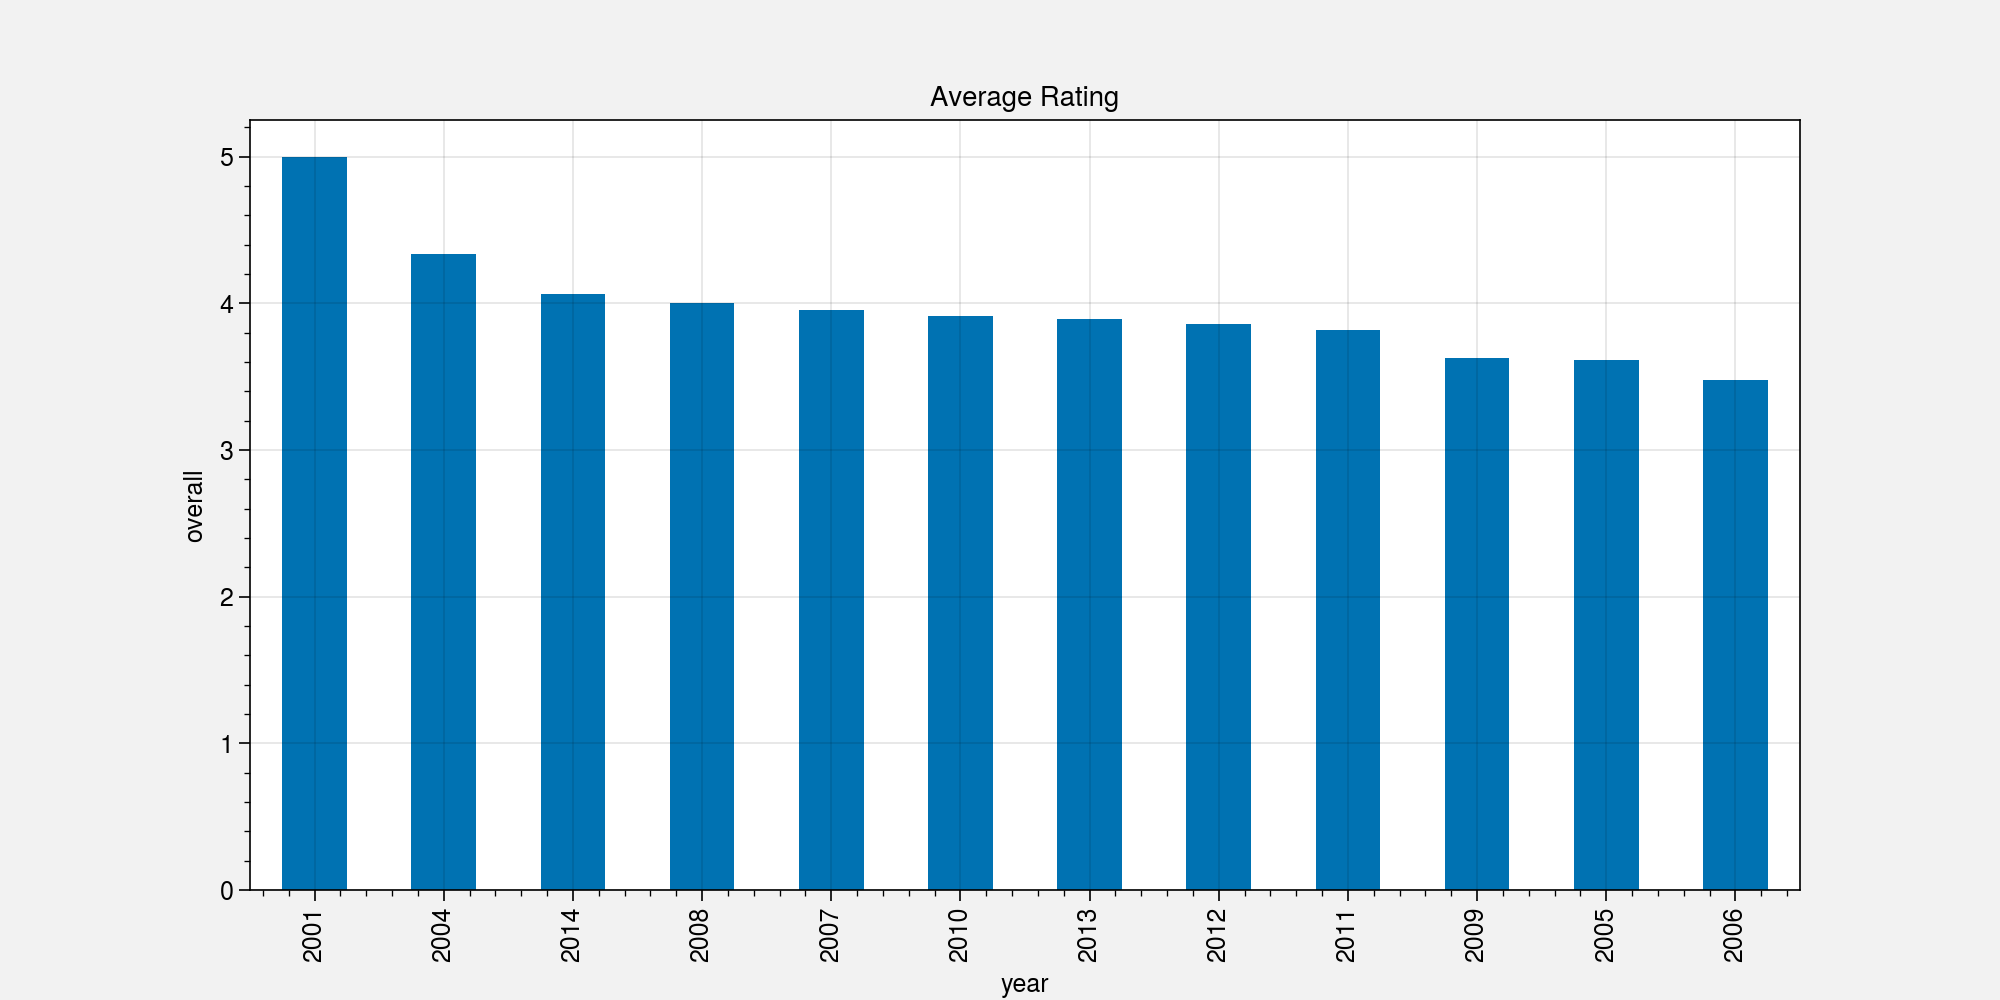

In [9]:
plt = df.groupby("year").overall.mean().sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.set_xlabel("year")
plt.set_ylabel("overall")
plt.set_title("Average Rating")

Faceting

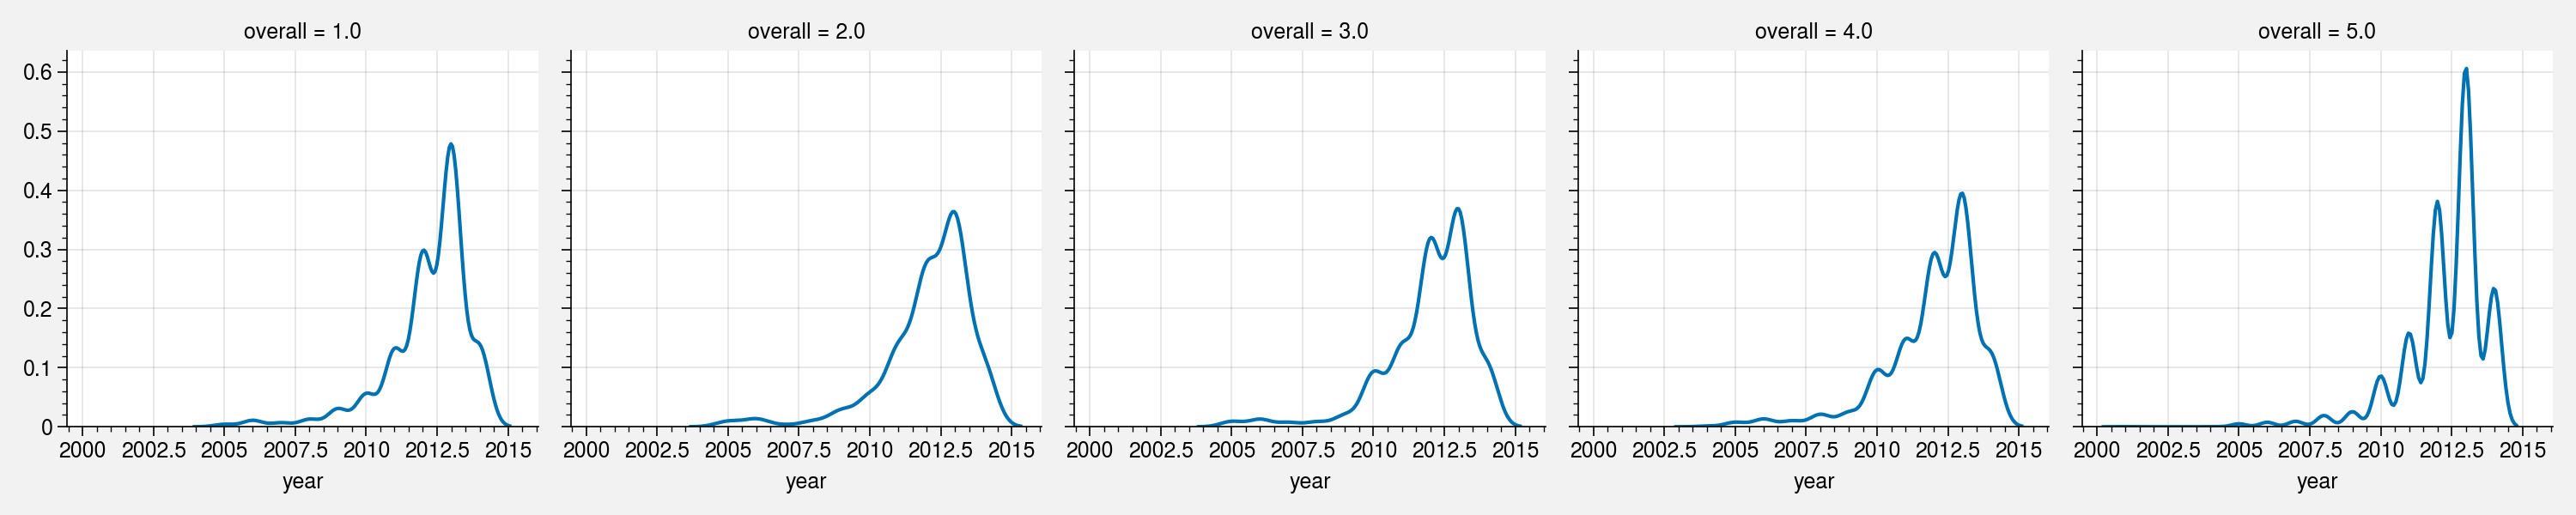

In [10]:
plt = sns.FacetGrid(df, col='overall')
plt = plt.map(sns.kdeplot, 'year')

Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


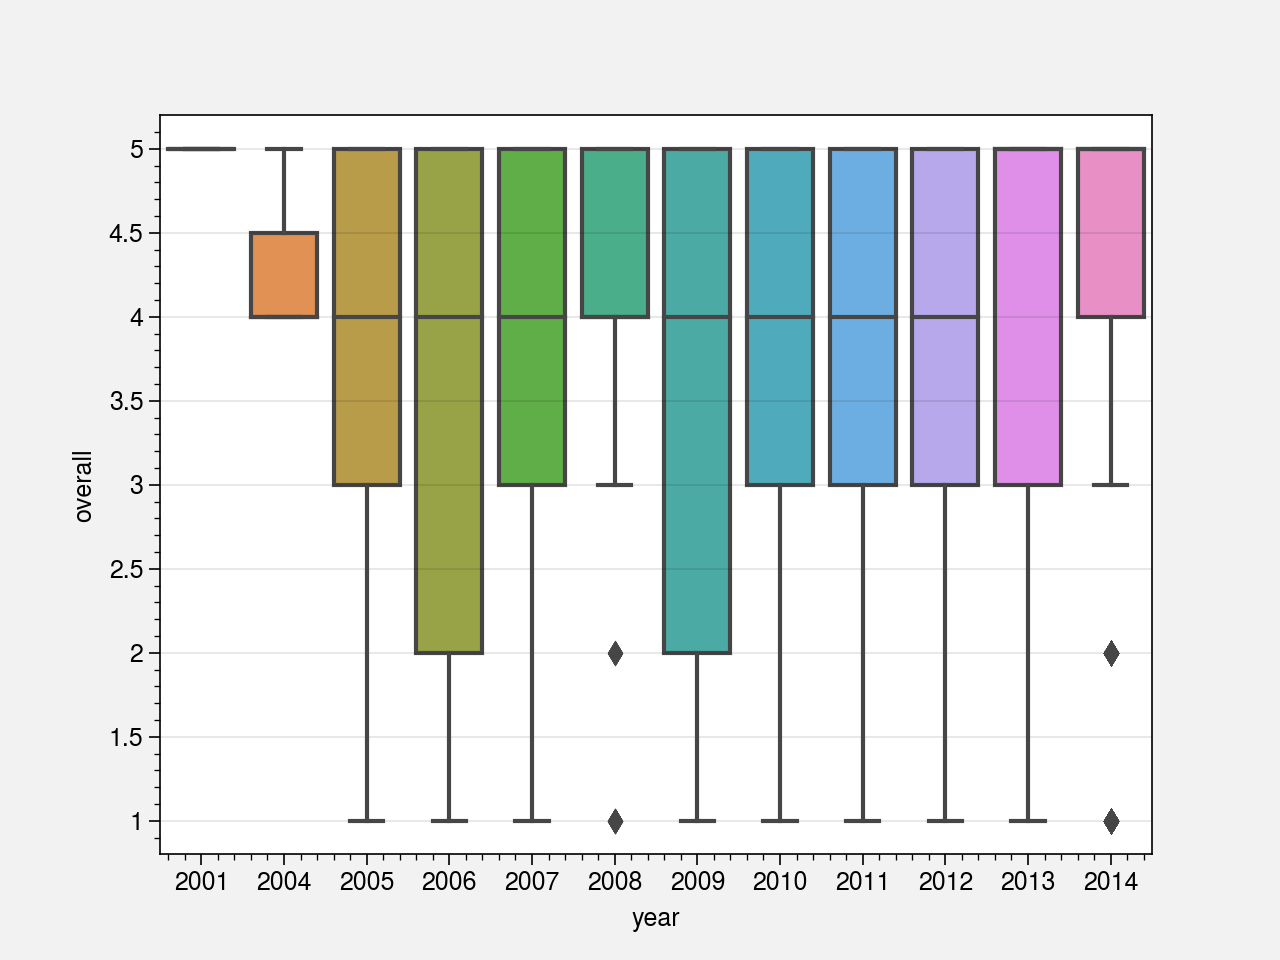

In [11]:
sns.boxplot('year','overall', data=df).figsize=(10, 5)